In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm  
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
day = pd.read_csv("day.csv")
day1 = pd.read_csv("day.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.size

11680

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

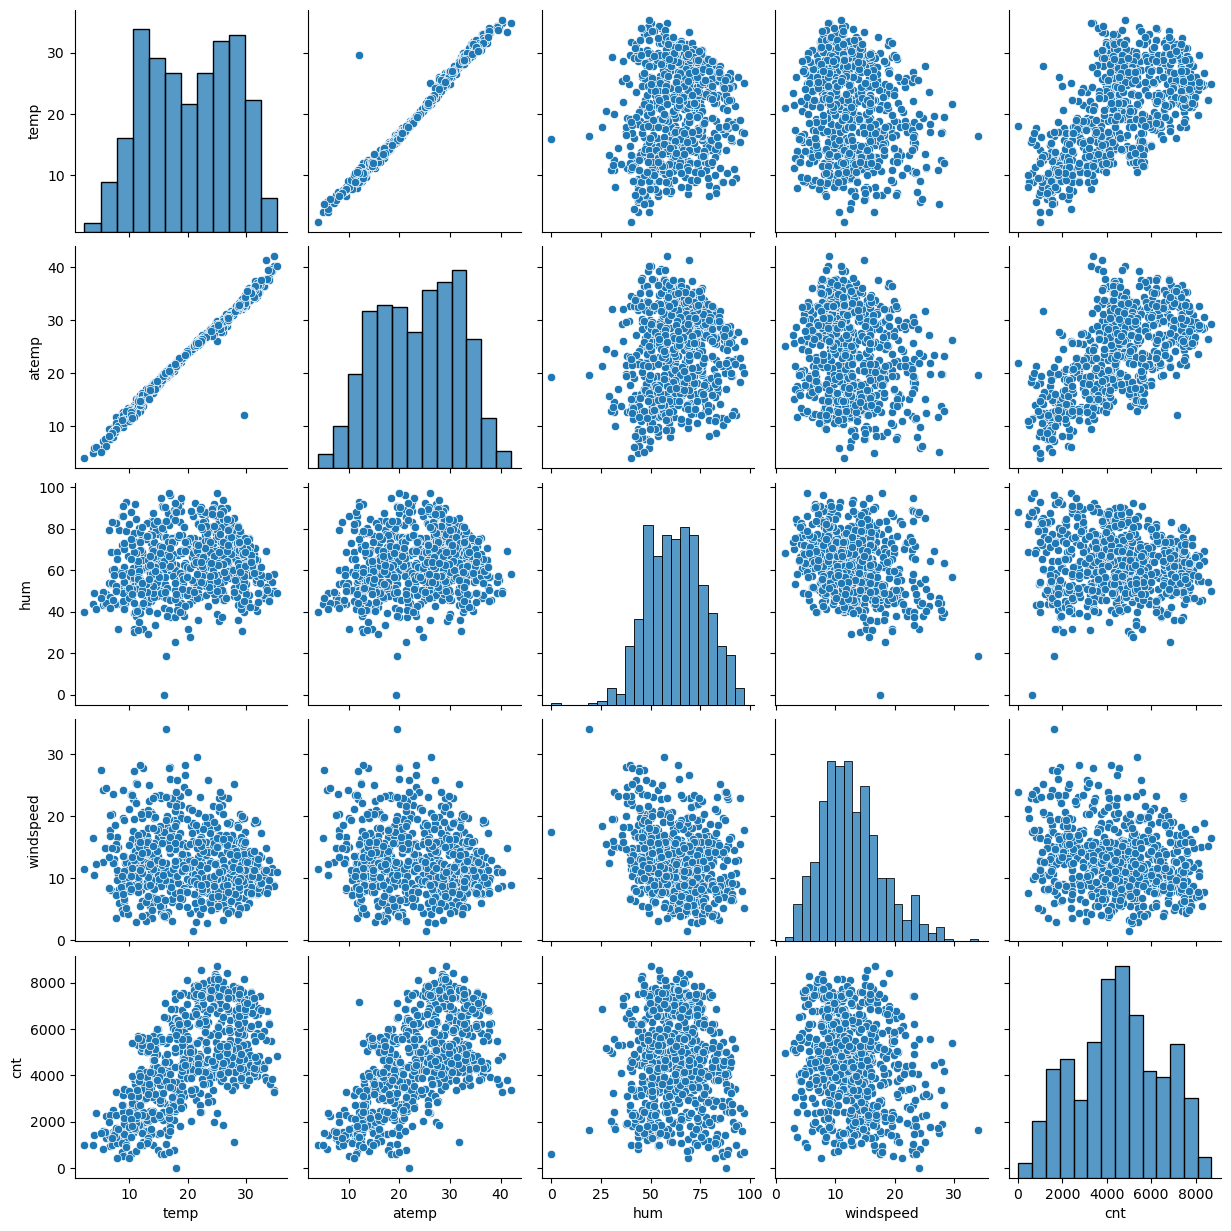

In [9]:
sns.pairplot(day, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

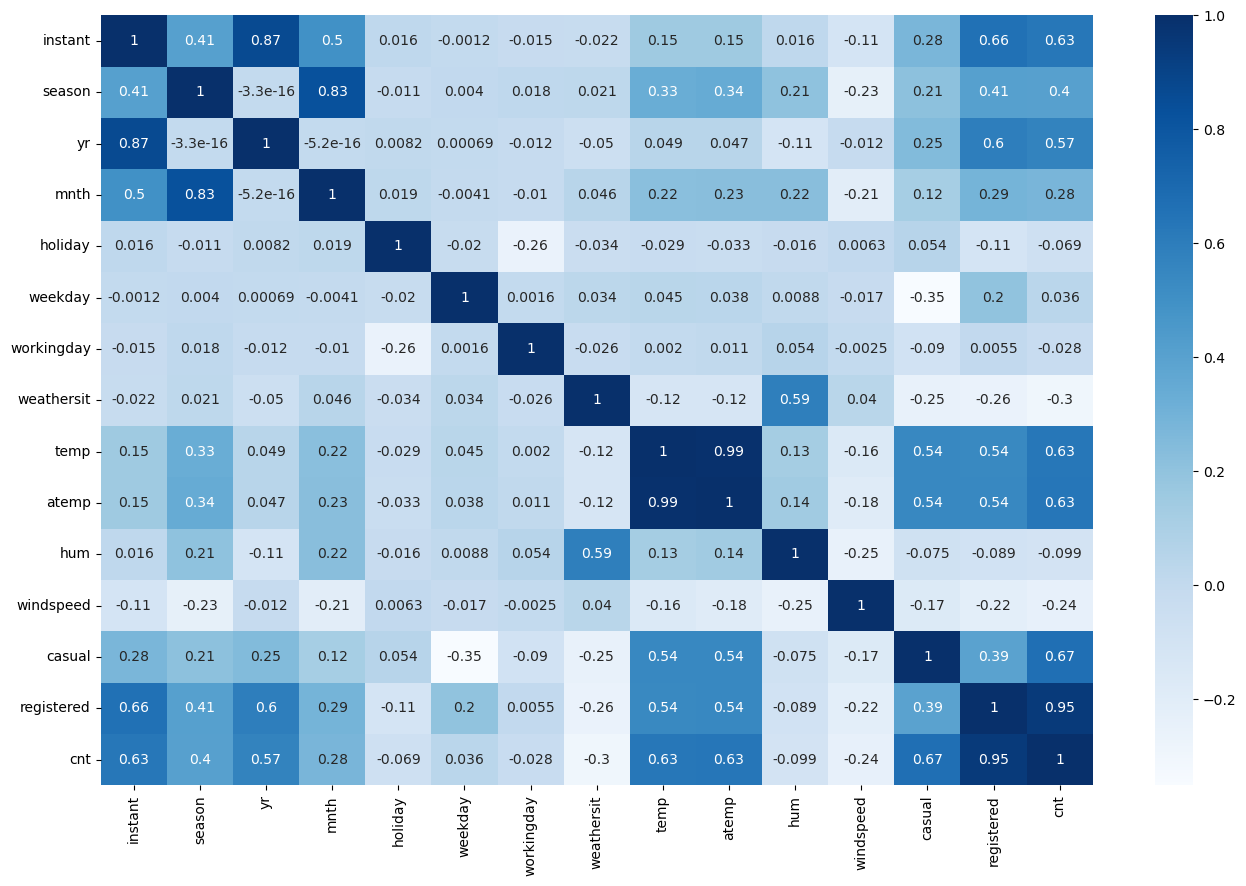

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="Blues")
plt.show()

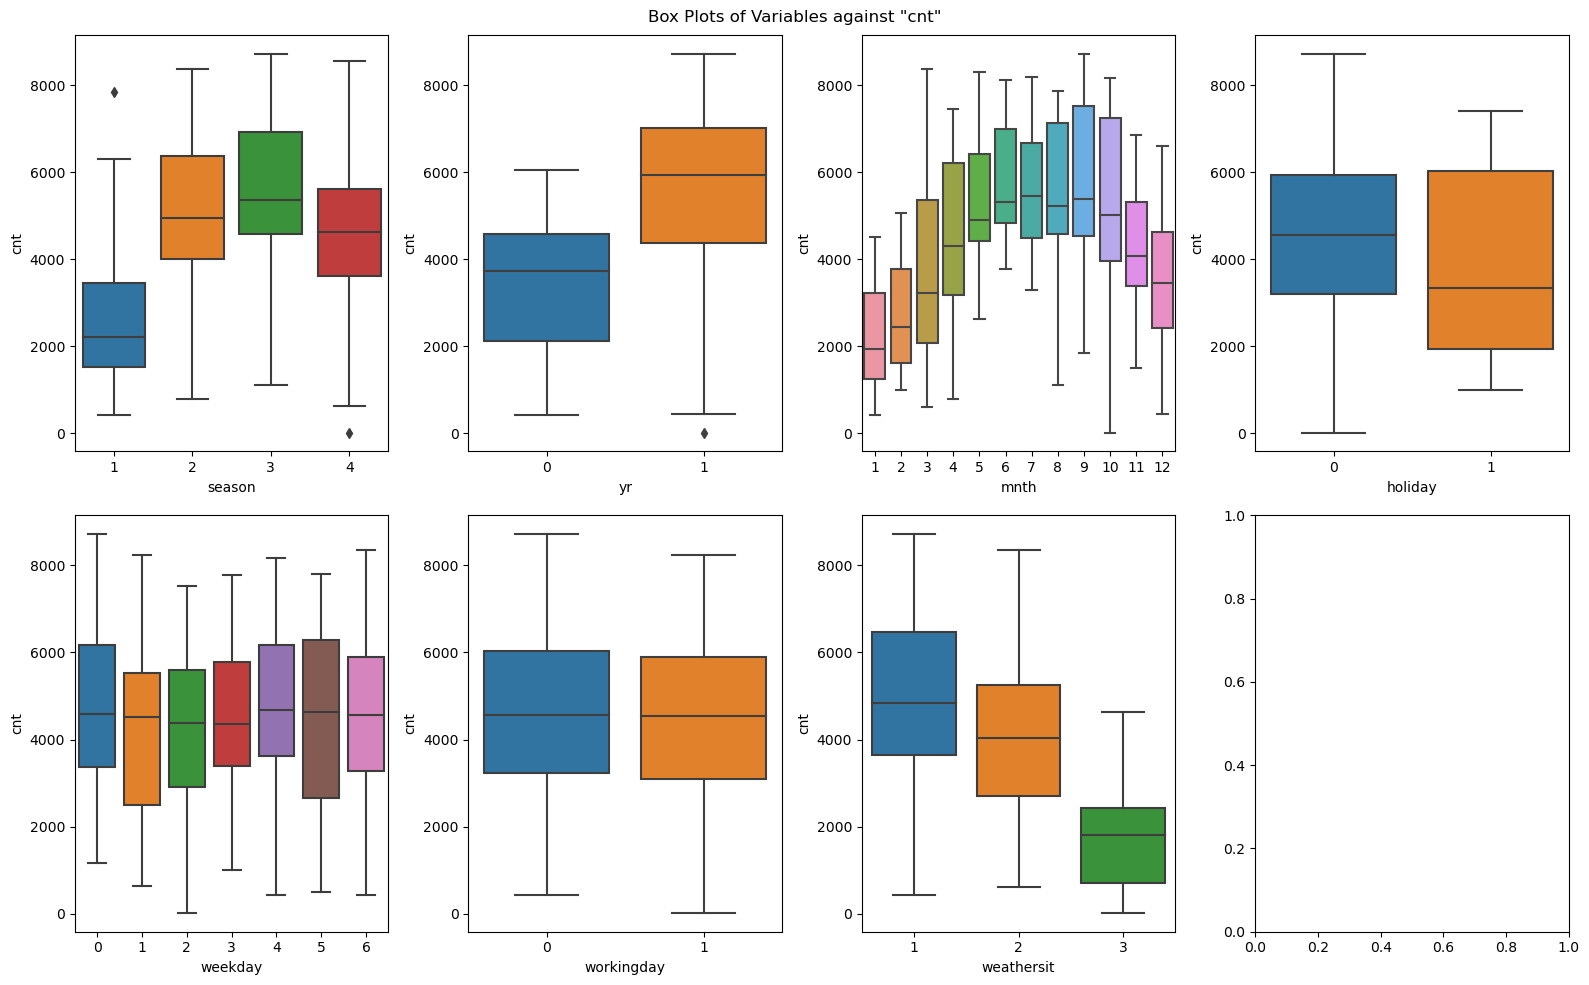

In [11]:
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axs = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('Box Plots of Variables against "cnt"')

for i, var in enumerate(cat_vars):
    row = i // 4
    col = i % 4
    sns.boxplot(data=day, x=var, y='cnt', ax=axs[row, col])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('cnt')

plt.tight_layout()
plt.show()

In [12]:
#droping insignificant columns
day.drop(['atemp'],axis=1,inplace=True)
day.drop(['casual'],axis=1,inplace=True)
day.drop(['registered'],axis=1,inplace=True)
day.drop(['dteday'],axis=1,inplace=True)
day.drop(['instant'],axis=1,inplace=True)

In [13]:
season_labels = { 1: 'Spring',2: 'Summer', 3: 'Fall',4: 'Winter'}

month_labels = { 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

weekday_labels = { 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

weather_labels = { 1: 'Clear', 2: 'Cloudy', 3: 'Light snow/rain'}

day['season'] = day['season'].map(season_labels)
day['mnth'] = day['mnth'].map(month_labels)
day['weekday'] = day['weekday'].map(weekday_labels)
day['weathersit'] = day['weathersit'].map(weather_labels)

day.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
season_indicators = pd.get_dummies(day['season'], drop_first=True, prefix='season')
mnth_indicators = pd.get_dummies(day['mnth'], drop_first=True, prefix='mnth')
weekday_indicators = pd.get_dummies(day['weekday'], drop_first=True, prefix='weekday')
weathersit_indicators = pd.get_dummies(day['weathersit'], drop_first=True, prefix='weathersit')

day = pd.concat([day, season_indicators, mnth_indicators, weekday_indicators, weathersit_indicators], axis=1)
day = day.drop(columns=['season', 'mnth', 'weekday', 'weathersit'])

In [15]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light snow/rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Cloudy', 'weathersit_Light snow/rain'],
      dtype='object')

# Splitting the data

In [17]:
dtrain,dtest = train_test_split(day,train_size=0.7,test_size=0.3,random_state=100)

In [18]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']
numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

In [19]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [20]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light snow/rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [22]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Cloudy', 'weathersit_Light snow/rain'],
      dtype='object')

# Modelling

In [23]:
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [24]:
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
19,1,True,mnth_September
17,1,True,mnth_November
26,1,True,weathersit_Cloudy
12,1,True,mnth_January
10,1,True,mnth_December
8,1,True,season_Winter
13,1,True,mnth_July
6,1,True,season_Spring
1,1,True,holiday


In [25]:
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'mnth_September', 'mnth_November', 'weathersit_Cloudy',
       'mnth_January', 'mnth_December', 'season_Winter', 'mnth_July',
       'season_Spring', 'holiday', 'season_Summer', 'temp',
       'weathersit_Light snow/rain', 'windspeed', 'hum'], dtype=object)

In [26]:
def ols_fit(y, X):
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y, X_train_sm).fit()
    summary = model.summary()
    return model, summary

def vif(X):
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index=df.columns).reset_index()
    sorted_vif_frame = vif_frame.sort_values(by='vif', ascending=False)
    return sorted_vif_frame

In [27]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x19f5aa262c0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.845
 Model:                            OLS   Adj. R-squared:                  0.841
 Method:                 Least Squares   F-statistic:                     180.2
 Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.34e-189
 Time:                        10:53:39   Log-Likelihood:                -4111.1
 No. Observations:                 510   AIC:                             8254.
 Df Residuals:                     494   BIC:                             8322.
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>

In [28]:
vif(X_train[selected_features])

,index,vif
0,const,82.483489
9,season_Spring,5.271109
12,temp,4.422592
7,season_Winter,3.826164
11,season_Summer,2.762976
15,hum,1.926382
3,mnth_November,1.755160
5,mnth_January,1.677258
4,weathersit_Cloudy,1.568397
6,mnth_December,1.494324


In [29]:
del_feature = 'December'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x19f5b5a2590>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.845
 Model:                            OLS   Adj. R-squared:                  0.841
 Method:                 Least Squares   F-statistic:                     180.2
 Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.34e-189
 Time:                        10:53:40   Log-Likelihood:                -4111.1
 No. Observations:                 510   AIC:                             8254.
 Df Residuals:                     494   BIC:                             8322.
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>

In [30]:
vif(X_train[selected_features])

,index,vif
0,const,82.483489
9,season_Spring,5.271109
12,temp,4.422592
7,season_Winter,3.826164
11,season_Summer,2.762976
15,hum,1.926382
3,mnth_November,1.755160
5,mnth_January,1.677258
4,weathersit_Cloudy,1.568397
6,mnth_December,1.494324


In [31]:
del_feature = 'Spring'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x19f5bfb5cf0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.845
 Model:                            OLS   Adj. R-squared:                  0.841
 Method:                 Least Squares   F-statistic:                     180.2
 Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.34e-189
 Time:                        10:53:40   Log-Likelihood:                -4111.1
 No. Observations:                 510   AIC:                             8254.
 Df Residuals:                     494   BIC:                             8322.
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>

In [32]:
vif(X_train[selected_features])

,index,vif
0,const,82.483489
9,season_Spring,5.271109
12,temp,4.422592
7,season_Winter,3.826164
11,season_Summer,2.762976
15,hum,1.926382
3,mnth_November,1.755160
5,mnth_January,1.677258
4,weathersit_Cloudy,1.568397
6,mnth_December,1.494324


In [33]:
del_feature = 'November'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x19f5bfb52a0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.845
 Model:                            OLS   Adj. R-squared:                  0.841
 Method:                 Least Squares   F-statistic:                     180.2
 Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.34e-189
 Time:                        10:53:40   Log-Likelihood:                -4111.1
 No. Observations:                 510   AIC:                             8254.
 Df Residuals:                     494   BIC:                             8322.
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>

In [34]:
vif(X_train[selected_features])

,index,vif
0,const,82.483489
9,season_Spring,5.271109
12,temp,4.422592
7,season_Winter,3.826164
11,season_Summer,2.762976
15,hum,1.926382
3,mnth_November,1.755160
5,mnth_January,1.677258
4,weathersit_Cloudy,1.568397
6,mnth_December,1.494324


In [35]:
del_feature = 'January'
selected_features = selected_features[selected_features!=del_feature]
fm = ols_fit(y_train,X_train[selected_features])
fm

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x19f5bd4ddb0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.845
 Model:                            OLS   Adj. R-squared:                  0.841
 Method:                 Least Squares   F-statistic:                     180.2
 Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.34e-189
 Time:                        10:53:40   Log-Likelihood:                -4111.1
 No. Observations:                 510   AIC:                             8254.
 Df Residuals:                     494   BIC:                             8322.
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>

In [36]:
vif(X_train[selected_features])

,index,vif
0,const,82.483489
9,season_Spring,5.271109
12,temp,4.422592
7,season_Winter,3.826164
11,season_Summer,2.762976
15,hum,1.926382
3,mnth_November,1.755160
5,mnth_January,1.677258
4,weathersit_Cloudy,1.568397
6,mnth_December,1.494324


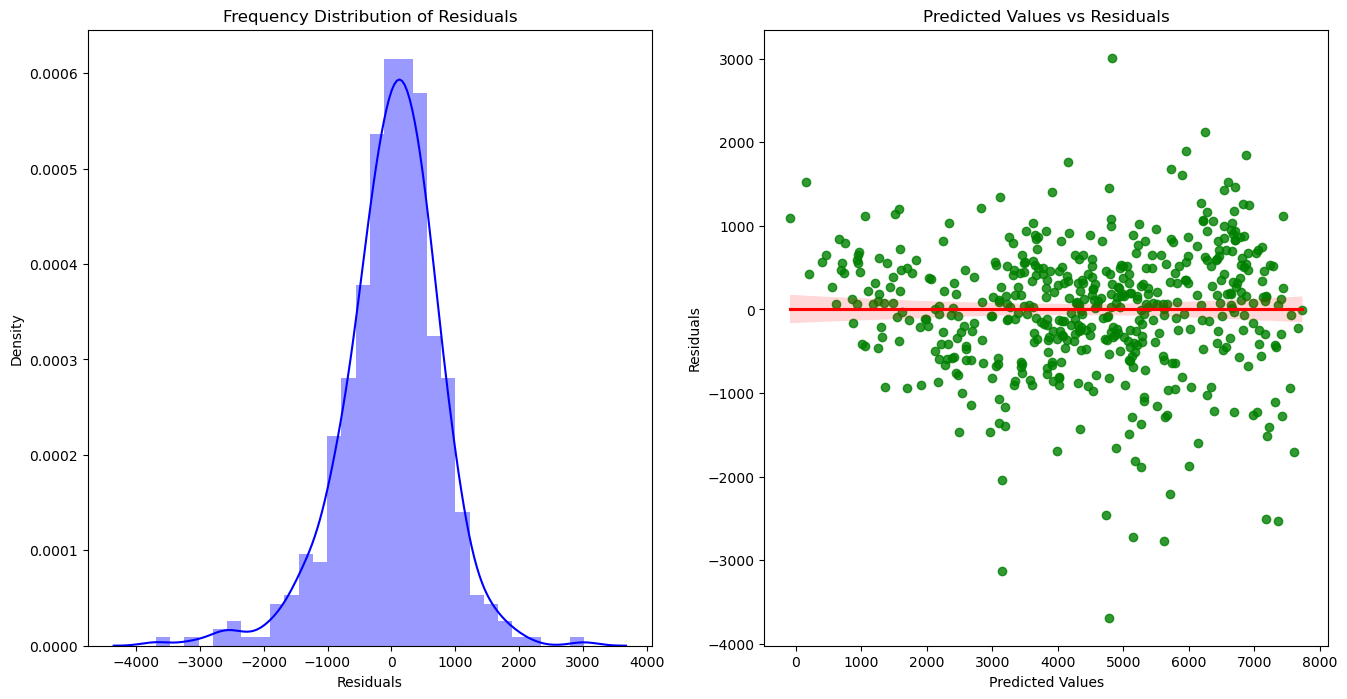

In [37]:
fm, summary = ols_fit(y_train, X_train[selected_features])

X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = fm.predict(X_train_sm)
fig, ax = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train - y_train_pred, bins=30, ax=ax[0], color='blue')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Density')

ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(x=y_train_pred, y=y_train - y_train_pred, ax=ax[1], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.show()


In [38]:
(y_train-y_train_pred).mean()

-1.2155129190753488e-11

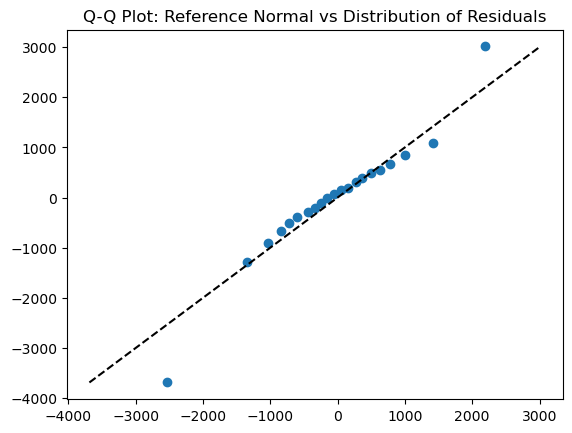

In [39]:
residuals = y_train - y_train_pred
mean = residuals.mean()
std = residuals.std()

ref_normal = np.random.normal(mean, std, residuals.shape[0])

percs = np.linspace(0, 100, 21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(residuals, percs)

plt.plot(qn_ref_normal, qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(), qn_residual.min())), np.max((qn_ref_normal.max(), qn_residual.max())))
plt.plot(x, x, color="k", ls="--")
plt.title('Q-Q Plot: Reference Normal vs Distribution of Residuals')
plt.show()


In [40]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [41]:
X_test = sm.add_constant(X_test)
y_test_pred = fm.predict(X_test)

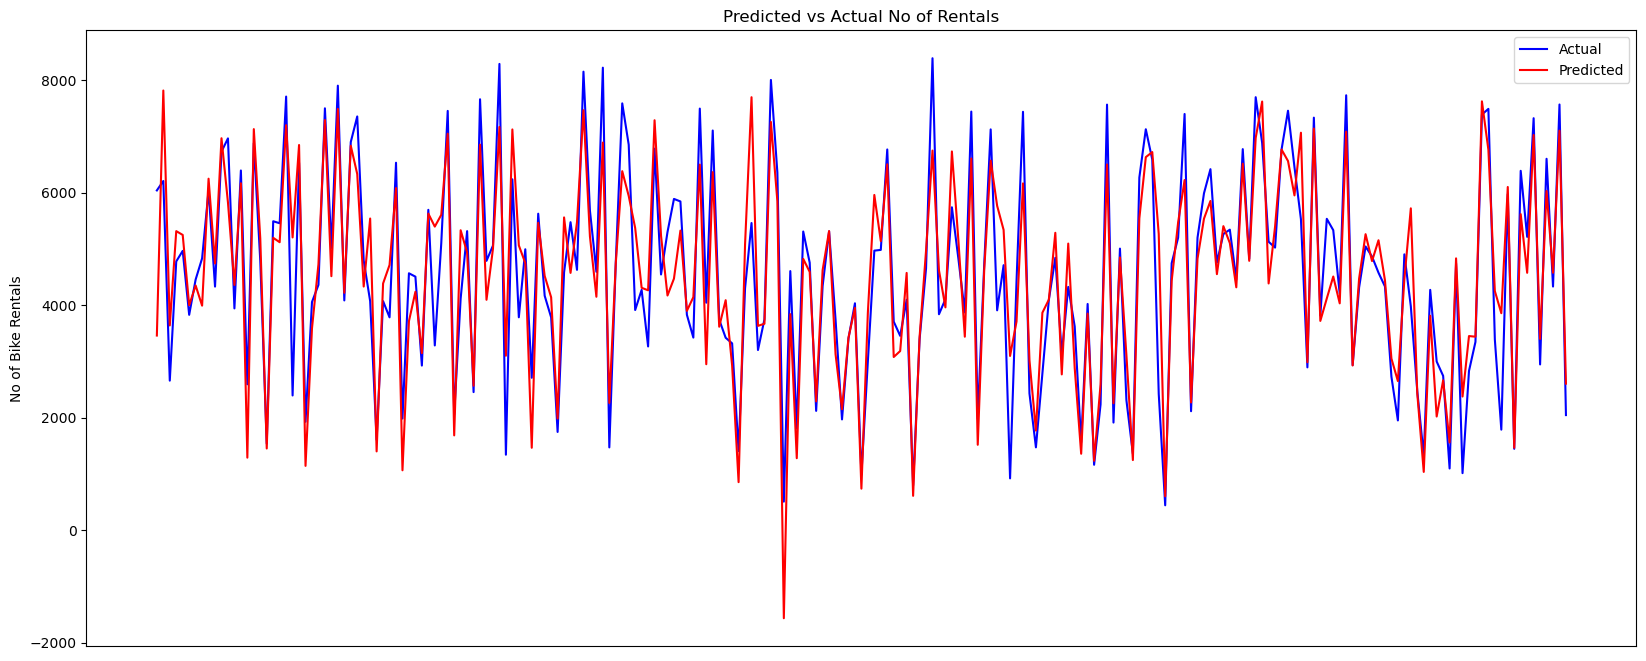

In [42]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1, = ax.plot(range(len(y_test)), y_test, color='blue')
l2, = ax.plot(range(len(y_test_pred)), y_test_pred, color='red')
plt.legend([l1, l2], ['Actual', 'Predicted'])
plt.title('Predicted vs Actual No of Rentals')
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


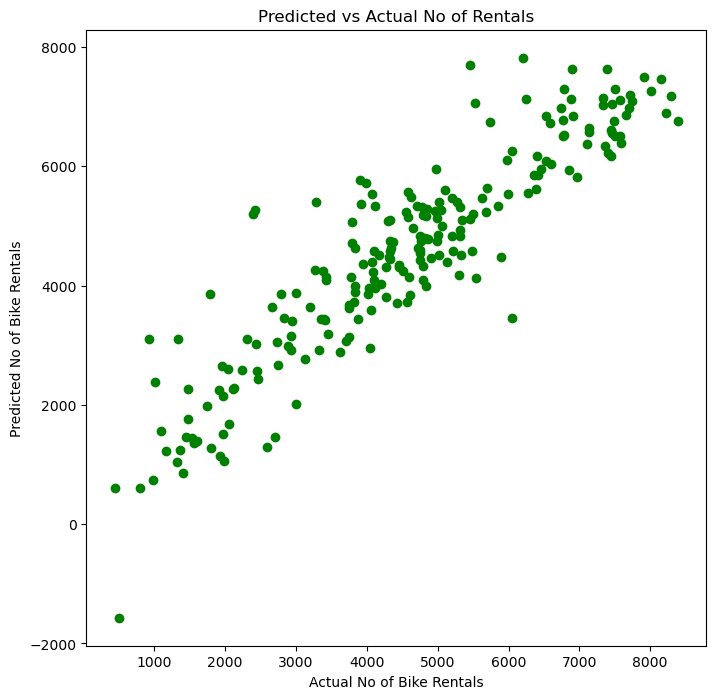

In [43]:
plt.figure(figsize=[8, 8])
plt.scatter(y_test, y_test_pred, color='green')
plt.title('Predicted vs Actual No of Rentals')
plt.xlabel('Actual No of Bike Rentals')
plt.ylabel('Predicted No of Bike Rentals')
plt.show()


In [44]:
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.82
Mean Squared Error 639995.849


In [45]:
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.76742936, 0.8125786 , 0.85101191, 0.82504519, 0.82465803,
       0.81872627, 0.78114968, 0.88514675, 0.86100731, 0.84279882])

In [48]:
print("R-square at 0.90 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.90 confidence level : 0.83 (+/- 0.07)


In [47]:
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])

std_X_train = pd.DataFrame(data=scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features:
    std_X_train[i] = data[i].values

reshaped_y_train = y_train.values.reshape(-1, 1)

# Fitting linear regression model
std_model = LinearRegression().fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data=std_model.coef_, columns=std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients', ascending=False)
intercept = std_model.intercept_
print('\nIntercept:', intercept)
result


Intercept: [2805.55619947]


,MLR Coefficients
temp,4171.955822
yr,2002.011871
season_Winter,899.054692
mnth_September,650.955478
season_Summer,354.345769
mnth_December,-323.338009
mnth_November,-355.925870
mnth_January,-380.257300
mnth_July,-482.365394
weathersit_Cloudy,-485.676909


In [ ]:
"""The data underwent a thorough cleaning process to remove outliers that could potentially have a negative impact on the model's performance. Furthermore, the model was carefully assessed for any multicollinearity effects. To ensure the validity of the linear regression assumptions, a comprehensive residual analysis was conducted, revealing that the residuals follow a normal distribution and that the errors demonstrate homoscedasticity.

A Q-Q plot comparing the residual distribution to a normal distribution indicated that the residuals conform to a normal distribution for all interpolations. However, for extrapolations, there were noticeable deviations, although they did not affect the applicability of linear regression.

Additionally, a Lag plot was generated, revealing no evidence of autocorrelation within the data. Through cross validation, the model's stability was determined, with a coefficient of determination of 83% (+/-7%) at a 90% confidence interval.

Finally, to provide insights into the relative importance of the predictors, all predictor values were standardized, and the features were reported in order of influence."""